In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
crypto=pd.read_csv("crypto-markets.csv")

In [5]:
crypto['date'] = pd.to_datetime(crypto.date)

In [6]:
crypto.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [7]:
# close -> log_close
crypto['log_close'] = np.log(crypto.close)
# volume -> log_volume
crypto['log_volume'] = np.log(crypto.volume)
# market -> log_market
crypto['log_market'] = np.log(crypto.market)
# Spread
crypto['spread'] = (crypto.high - crypto.low) / crypto.close
# return -> log (close / open)
crypto['log_return'] = np.log(crypto.close / crypto.close.shift(1))

In [8]:
crypto.close.head()

0    134.21
1    144.54
2    139.00
3    116.99
4    105.21
Name: close, dtype: float64

In [9]:
crypto.close.shift(1).head()

0       NaN
1    134.21
2    144.54
3    139.00
4    116.99
Name: close, dtype: float64

In [10]:
# handle missing data: http://pandas.pydata.org/pandas-docs/version/0.9.0/missing_data.html
crypto = crypto.replace([np.inf,-np.inf, np.nan], 0)

In [11]:
crypto.head(10)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,log_close,log_volume,log_market,log_return
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,0.028910,4.899406,0.0,21.121080,0.000000
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,0.093331,4.973556,0.0,21.195622,0.074151
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,0.092662,4.934474,0.0,21.156873,-0.039082
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,0.274981,4.762088,0.0,20.984826,-0.172385
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,0.316700,4.655958,0.0,20.879002,-0.106130
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0.0,1.085995e+09,0.6424,0.296982,4.582413,0.0,20.805763,-0.073545
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0.0,1.250317e+09,0.8889,0.200000,4.722953,0.0,20.946663,0.140540
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0.0,1.288693e+09,0.7521,0.100595,4.752814,0.0,20.976894,0.029861
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0.0,1.249023e+09,0.3141,0.160463,4.721174,0.0,20.945628,-0.031640
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0.0,1.240594e+09,0.8767,0.141166,4.714025,0.0,20.938856,-0.007149


In [12]:
crypto.shape

(942297, 17)

In [13]:
len(crypto.slug.unique())

2071

In [14]:
# count number of trading days up to now as birth-time of each currency
birth_time = pd.DataFrame(crypto.slug.value_counts())

In [15]:
crypto = pd.merge(crypto, birth_time, how='inner', left_on = 'slug', right_on = 'slug')


In [16]:
crypto.describe()


,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,log_close,log_volume,log_market,log_return,count
count,942297,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,942297.000000,942297.000000,942297.000000,942297.000000,942297.000000,942297.000000
mean,2017-08-10 04:42:55.641438208,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720390e+06,1.725060e+08,0.459499,0.657106,-3.843110,8.385009,12.063038,0.000005,924.868466
min,2013-04-28 00:00:00,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000,-22.332704,0.000000,0.000000,-17.046710,2.000000
25%,2016-12-17 00:00:00,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.086405,-6.068778,5.164786,10.294888,-0.065305,396.000000
50%,2018-01-18 00:00:00,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.157065,-3.734212,8.361241,13.166947,-0.002853,796.000000
75%,2018-07-24 00:00:00,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,0.284765,-1.487512,11.687635,15.743351,0.050774,1509.000000
max,2018-11-30 00:00:00,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265020e+11,1.000000,332513.795858,14.648741,23.894668,26.511702,21.918794,2042.000000
std,NaN,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839803e+08,3.575590e+09,0.326160,343.339107,3.811215,4.406757,5.428543,0.313465,588.180332


In [17]:
crypto_market = crypto.groupby('date')[['market', 'volume']].sum()

<Axes: title={'center': 'Total market size'}, xlabel='date', ylabel='market'>

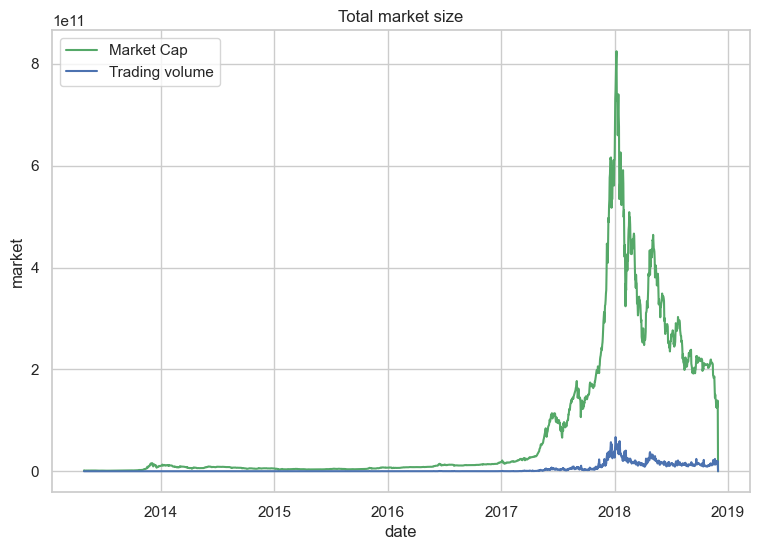

In [18]:
sns.set(style="whitegrid")
fig1, ax1 = plt.subplots(figsize=(9,6))
ax1.set_title('Total market size')
sns.lineplot(data=crypto_market.market, color="g", label='Market Cap')
sns.lineplot(data=crypto_market.volume, color="b", label='Trading volume')

In [19]:
crypto_3 = crypto[(crypto.ranknow <= 3)]
crypto_5 = crypto[(crypto.ranknow <= 5)]

Text(0.5, 1.0, 'Top 5 market competitors')

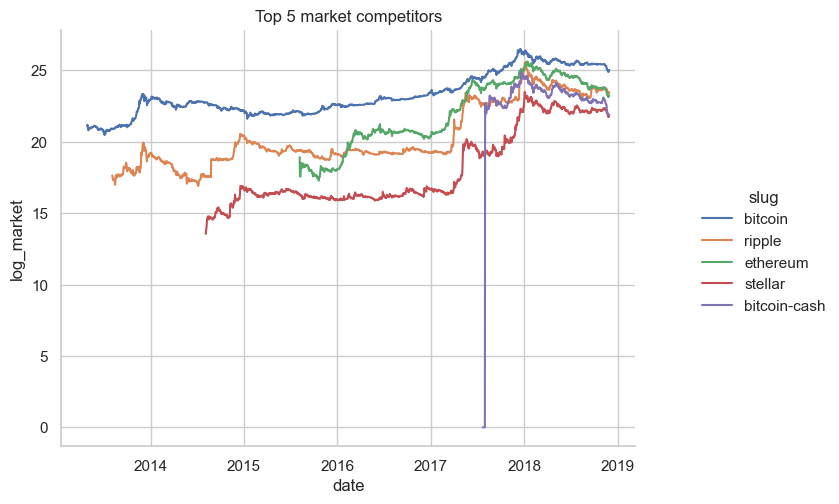

In [20]:
g = sns.relplot(x = 'date', y = 'log_market', kind = 'line', data = crypto_5, hue = 'slug')
g.fig.set_figwidth(9)
g.ax.set_title("Top 5 market competitors")

In [21]:
crypto_snap = crypto[crypto.date == datetime(2018,11,29)]

In [22]:
crypto_snap.sort_values('ranknow', ascending=True).head(5)


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,log_close,log_volume,log_market,log_return,count
2041,bitcoin,BTC,Bitcoin,2018-11-29,1,4269.000000,4413.020000,4145.770000,4278.850000,6.503348e+09,7.445102e+10,0.4980,0.062458,8.361440,22.595583,25.033407,0.005021,2042
3985,ripple,XRP,XRP,2018-11-29,2,0.391862,0.392465,0.373789,0.379562,6.299006e+08,1.530674e+10,0.3091,0.049204,-0.968737,20.261073,23.451559,-0.028556,1944
5196,ethereum,ETH,Ethereum,2018-11-29,3,122.720000,123.230000,115.300000,117.540000,2.196099e+09,1.216629e+10,0.2825,0.067466,4.766779,21.509949,23.221934,-0.040842,1211
6774,stellar,XLM,Stellar,2018-11-29,4,0.161831,0.172107,0.155423,0.165080,8.886206e+07,3.162026e+09,0.5788,0.101066,-1.801325,18.302596,21.874479,0.017372,1578
7269,bitcoin-cash,BCH,Bitcoin Cash,2018-11-29,5,190.100000,191.150000,176.830000,180.980000,8.916690e+07,3.164359e+09,0.2898,0.079125,5.198387,18.306020,21.875216,-0.049006,495


In [23]:
crypto_snap['composition'] = np.where(crypto_snap.ranknow <= 10, crypto_snap.ranknow, 100)

In [24]:
crypto_mkt_comp = crypto_snap.groupby(by = ['composition'])['market'].sum()

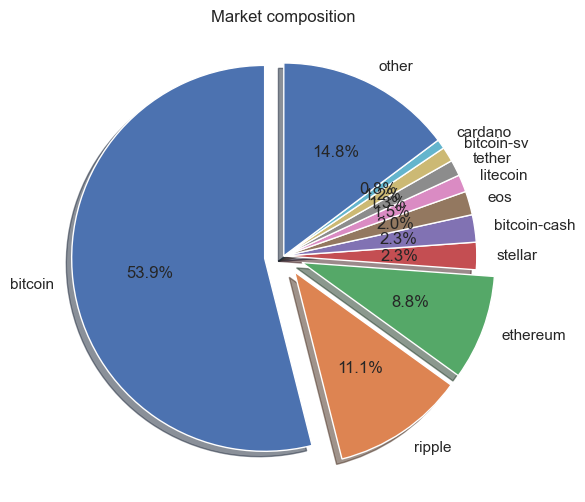

In [25]:
# Code reference:
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = crypto_snap[crypto_snap.ranknow <= 11].slug.replace('monero', 'other')
sizes = crypto_mkt_comp
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the first 3 slices

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('Market composition')
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [26]:
bitcoin = crypto[crypto.slug == 'bitcoin']

In [27]:
bitcoin.log_return.describe()

count    2042.000000
mean        0.001695
std         0.043856
min        -0.266198
25%        -0.012434
50%         0.001917
75%         0.018403
max         0.357451
Name: log_return, dtype: float64

In [28]:
def plot_time_series(time_series):
    fig, (histo, qq) = plt.subplots(1, 2, figsize=(12, 4))
    histo.hist(time_series, bins = 20)
    histo.set_title('Distribution of time series')
    histo.set_xlabel('log return')
    histo.set_ylabel('frequency')
    stats.probplot(time_series, dist='norm', plot=plt)
    plt.show()

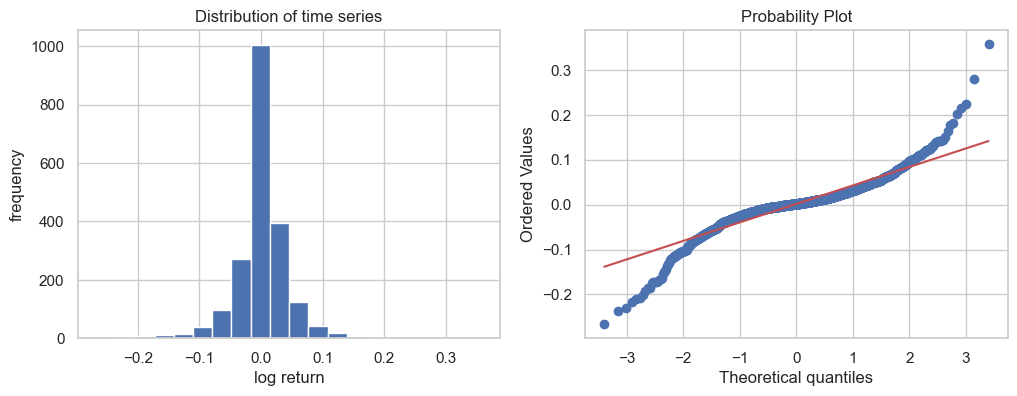

In [29]:
plot_time_series(bitcoin.log_return)

In [30]:
bitcoin_moment = [bitcoin.log_return.mean(), bitcoin.log_return.std(), bitcoin.log_return.skew(), bitcoin.log_return.kurtosis()]
pd.DataFrame(bitcoin_moment, columns = list(["Moments of bitcoin"]), index = list(["mean", "variance", "skewness", "kurtosis"]))

,Moments of bitcoin
mean,0.001695
variance,0.043856
skewness,-0.195551
kurtosis,7.940365


In [31]:
# VaR for bitcoin historical data
bitcoin_VaR = - (bitcoin_moment[0] - 1.96 * bitcoin_moment[1])
bitcoin_VaR

0.08426324595302424

In [32]:
# exceedence for bitcoin historical data
bitcoin_exceedence = bitcoin.log_return[abs(bitcoin.log_return - bitcoin_moment[0]) > 1.96 * bitcoin_moment[1]]
len(bitcoin_exceedence) / len(bitcoin.log_return) * 100

5.925563173359452

In [33]:
# max one day loss for bitcoin historical data
bitcoin[bitcoin.log_return == min(bitcoin.log_return)]

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,log_close,log_volume,log_market,log_return,count
234,bitcoin,BTC,Bitcoin,2013-12-18,1,678.2,679.32,420.51,522.7,0.0,6.347159e+09,0.3948,0.495141,6.259008,0.0,22.571273,-0.266198,2042


In [34]:
# maximum drawdown for bitcoin historical data.
def max_drawdown(time_series):
    
    N = len(time_series) # length of list/trading days
    S = [0] * (1+N) # S[i] is the running sum up to i-th date
    T = [0] * (1+N) # T[i] is the maximum running sum up to i-th date
    V = [0] * (1+N) # V[j,i] is the maximum drawdown = S[i] - T[j]
    i = 0 # i is the loc where minimun congruate sum begins
    j = 0 # j is the loc where minimun congruate sum ends
    k = 0 # k is the loc where maximum running sum ends
    
    for n in range(1,1+N,1):     
        S[n] = S[n-1] + list(time_series['log_return'])[n-1]
        
        # update T[n] = max(T[n-1], S(n))
        if T[n-1] < S[n]:
            T[n] = S[n]
            k = n # update k to be the loc of T max
        else: 
            T[n] = T[n-1]
            
        # update V[n] = min(S[n]-T[n], V[n-1])
        if V[n-1] < S[n]-T[n]:
            V[n] = V[n-1]
        else:
            V[n] = S[n]-T[n]
            i = k # update i to be the loc of T max
            j = n # update j to be the loc of V min

    trading = pd.DataFrame(
                            {'running sum': S[1:],
                             'maximum up to point': T[1:],
                             'minimum congruate sum': V[1:]
                            }, index = time_series.date)

    # plot three lines
    sns.lineplot(data=trading)
    # print max draw and corresponding time window
    from_date = i
    to_date = j
    print("Maximum drawdown is " + str(round(min(V)*100,2)) 
          + '%, from ' + str(trading.index[from_date].strftime("%Y-%m-%d")) 
          + ' to ' + str(trading.index[to_date].strftime("%Y-%m-%d")))

From earliest to now,
Maximum drawdown is -186.62%, from 2013-12-05 to 2015-01-15


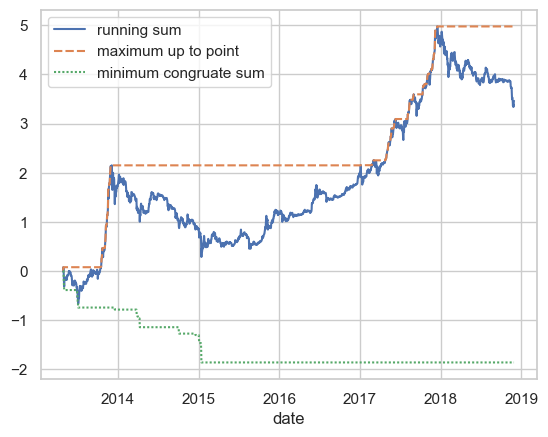

In [35]:
print("From earliest to now,")
max_drawdown(bitcoin)

From 2017-01-01 to now, 
Maximum drawdown is -164.08%, from 2017-12-17 to 2018-11-27


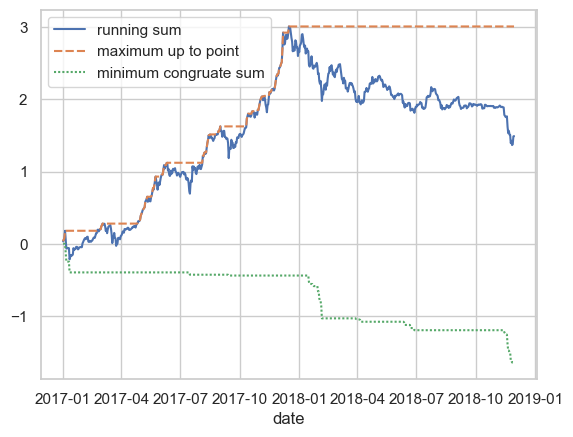

In [36]:
print("From 2017-01-01 to now, ")
max_drawdown(bitcoin[bitcoin.date.dt.year >= 2017])

Text(0.5, 1.0, 'log_market')

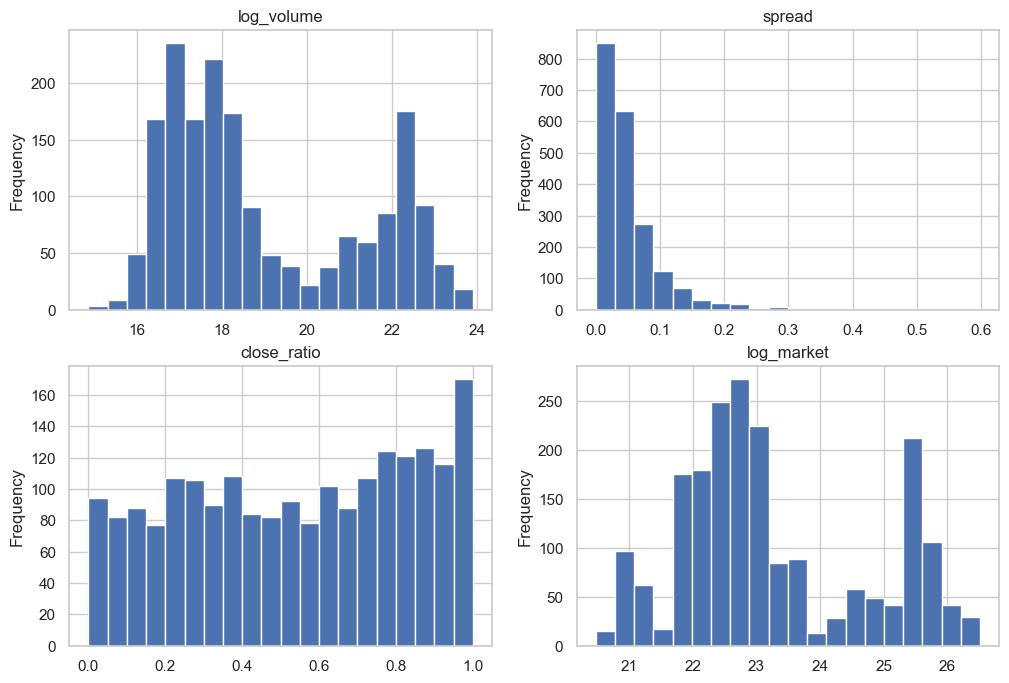

In [37]:
fig, axs = plt.subplots(2,2,figsize=(12, 8))
bitcoin['log_volume'][bitcoin['log_volume'] > 0].plot.hist(bins = 20, ax = axs[0,0]).set_title("log_volume")
bitcoin['spread'].plot.hist(bins = 20, ax = axs[0,1]).set_title("spread")
bitcoin['close_ratio'].plot.hist(bins = 20, ax = axs[1,0]).set_title("close_ratio")
bitcoin['log_market'].plot.hist(bins = 20, ax = axs[1,1]).set_title("log_market")

Text(0.5, 1.0, 'log_volume')

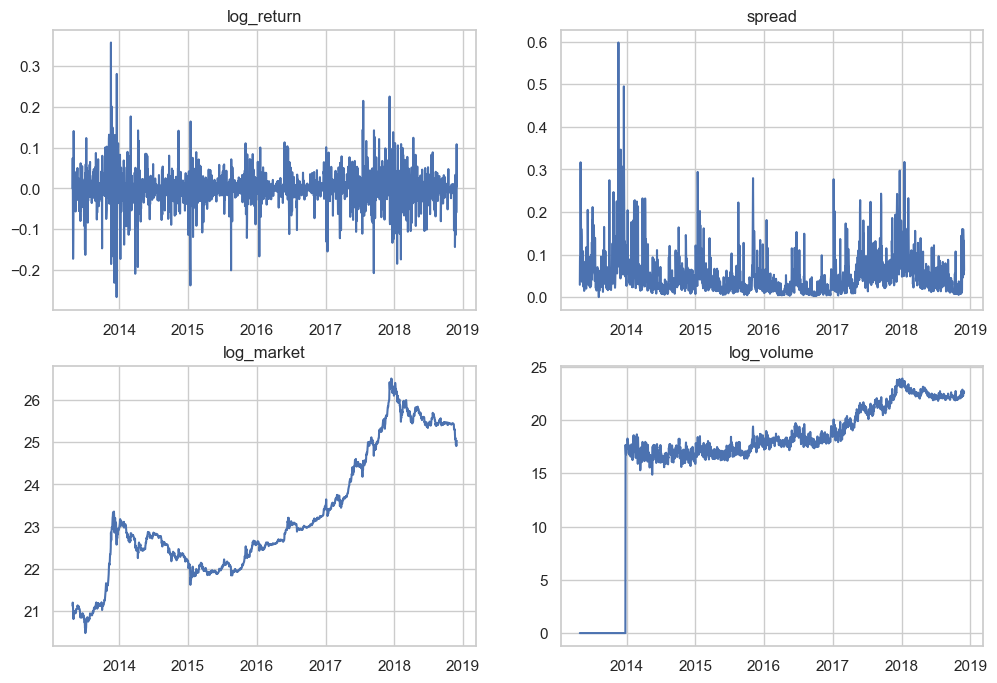

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))

ax1.plot(bitcoin.date, bitcoin.log_return)
ax1.set_title("log_return")
ax2.plot(bitcoin.date, bitcoin.spread)
ax2.set_title("spread")
ax3.plot(bitcoin.date, bitcoin.log_market)
ax3.set_title("log_market")
ax4.plot(bitcoin.date, bitcoin.log_volume)
ax4.set_title("log_volume")

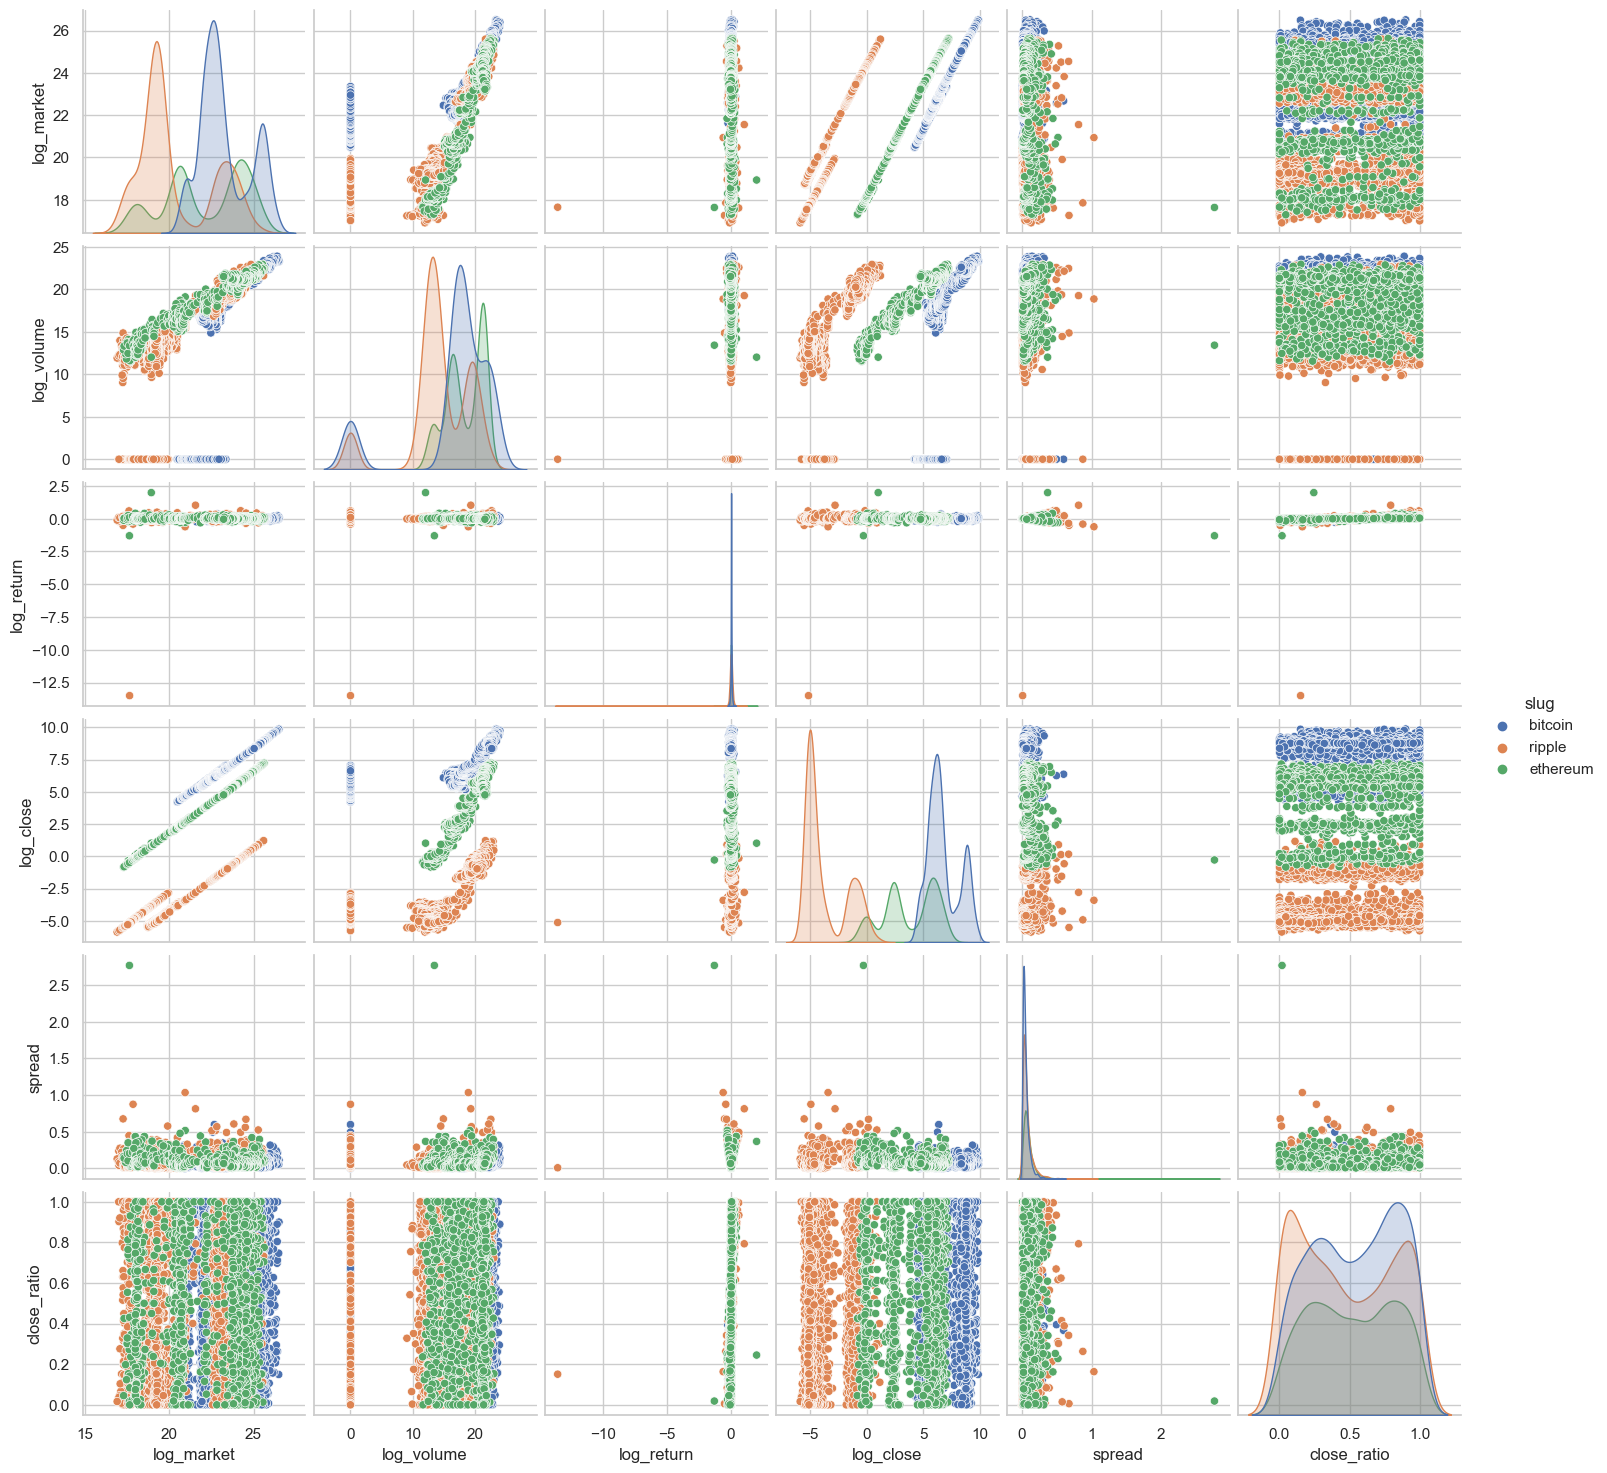

In [39]:
sns.pairplot(crypto_3[['slug','log_market','log_volume','log_return','log_close','spread','close_ratio']],hue="slug")


In [40]:
crypto_snap.log_market.describe()


count    2071.000000
mean       11.422279
std         5.529249
min         0.000000
25%        10.487206
50%        13.105313
75%        14.917343
max        25.033407
Name: log_market, dtype: float64

In [41]:
## discrization of market cap into groups
bins = [2,10,13,15,18,30]
crypto_snap['market_group'] = pd.cut(crypto_snap.log_market, bins)
crypto_snap['market_group'].value_counts()

market_group
(13, 15]    558
(10, 13]    556
(15, 18]    433
(2, 10]     124
(18, 30]     65
Name: count, dtype: int64

In [42]:
# large market cap currency and small market cap currency has a significant different in log return.
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [43]:
### Categorical variable for regression
model1 = smf.ols('log_return ~ C(market_group)', data=crypto_snap).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_return   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.974
Date:                Sun, 25 Feb 2024   Prob (F-statistic):             0.0184
Time:                        22:22:21   Log-Likelihood:                 142.83
No. Observations:                1736   AIC:                            -275.7
Df Residuals:                    1731   BIC:                            -248.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                              -0.0512      0.020     -2.557      0.011      -0.091      -0.012
C(market_group)[T.Interval(10, 13, closed='right')]     0.0391      0.022      1.763      0.078      -0.004       0.083
C(market_group)[T.Interval(13, 15, closed='right')]     0.0663      0.022      2.991      0.003       0.023       0.110
C(market_group)[T.Interval(15, 18, closed='right')]     0.0629      0.023      2.766      0.006       0.018       0.107
C(market_group)[T.Interval(18, 30, closed='right')]     0.0533      0.034      1.559      0.119      -0.014       0.120
==============================================================================
Omnibus:                     1558.187   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373094.088
Skew:                           3.444   Prob(JB):                         0.00
Kurtosis:                      74.488   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: title={'center': 'Performance spectrum - Top 12 cryptocurrencies'}, xlabel='slug', ylabel='log_return'>

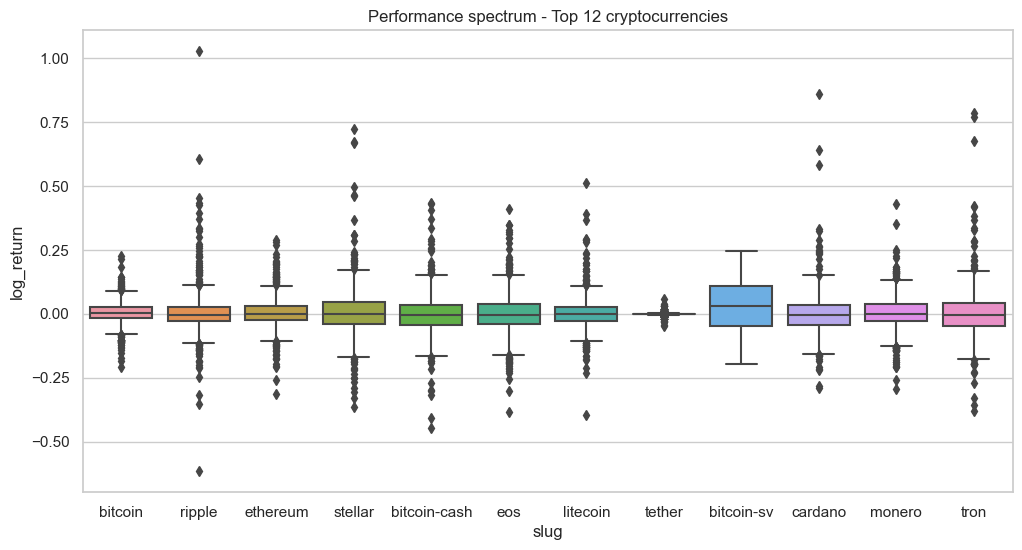

In [72]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Performance spectrum - Top 12 cryptocurrencies')
sns.boxplot(x='slug', y='log_return', data=crypto2017[crypto2017.ranknow <= 12], ax=ax)

In [73]:
crypto2017 = crypto[crypto.date.dt.year >= 2017]


In [78]:
crypto2017 = crypto2017[crypto2017['market'] > 0]

In [81]:
crypto_mean = pd.DataFrame(crypto2017['log_return'].groupby(crypto2017['slug']).mean())

In [82]:
crypto_snap_group = pd.merge(crypto_mean, pd.DataFrame(crypto_snap[['slug','composition','market_group']]), how='inner', on = 'slug')


In [84]:
bitcoin2017 = crypto2017[crypto2017.slug == 'bitcoin']
ethereum2017 = crypto2017[crypto2017.slug == 'ethereum']
ripple2017 = crypto2017[crypto2017.slug == 'ripple']

In [85]:
virtual_asset = pd.DataFrame(columns =[], index = bitcoin2017.date)
virtual_asset = pd.merge(virtual_asset, bitcoin2017[['date', 'log_return']], how='inner', left_on = 'date', right_on = 'date')
virtual_asset = pd.merge(virtual_asset, ethereum2017[['date', 'log_return']], how='inner', left_on = 'date', right_on = 'date')
virtual_asset = pd.merge(virtual_asset, ripple2017[['date', 'log_return']], how='inner', left_on = 'date', right_on = 'date')
virtual_asset.columns = ['Date','bitcoin', 'ethereum', 'ripple']

In [86]:
virtual_asset.set_index('Date').head()


,bitcoin,ethereum,ripple
Date,,,
2017-01-01,0.035262,0.024784,-0.012640
2017-01-02,0.023188,0.025379,-0.008991
2017-01-03,0.021389,0.149366,0.011814
2017-01-04,0.100960,0.145154,0.028406
2017-01-05,-0.130575,-0.093090,-0.057803


In [87]:
from datetime import datetime
start = datetime(2017, 1, 1)
end = datetime(2018, 11, 30)

In [88]:
# GOLD PRICE
import quandl
quandl.ApiConfig.api_key = 'jou3Hy9N_sKPZxy9mgxt'
gold_price = quandl.get("LBMA/GOLD", start_date = start, end_date = end)
gold_price.tail()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2018-11-26,1226.65,1223.40,954.58,952.54,1079.33,1077.57
2018-11-27,1225.05,1221.20,959.70,958.76,1082.21,1080.76
2018-11-28,1213.20,1213.25,949.69,949.00,1074.77,1075.79
2018-11-29,1226.45,1226.25,959.94,960.03,1079.15,1077.87
2018-11-30,1220.45,1217.55,956.95,955.65,1073.75,1074.00


In [89]:
# S&P 500 INDEX 
import yfinance as yf
stock_index = yf.download('^GSPC', start=start, end=end)
stock_index.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-23,2633.360107,2647.550049,2631.090088,2632.560059,2632.560059,1651680000
2018-11-26,2649.969971,2674.350098,2649.969971,2673.449951,2673.449951,3523520000
2018-11-27,2663.750000,2682.530029,2655.889893,2682.169922,2682.169922,3494380000
2018-11-28,2691.449951,2744.000000,2684.379883,2743.790039,2743.790039,3984540000
2018-11-29,2736.969971,2753.750000,2722.939941,2737.800049,2737.800049,3599200000


In [90]:
# DOLLAR INDEX 
import yfinance as yf
USD_index = yf.download('DX-Y.NYB', start, end)
USD_index.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-23,96.510002,96.980003,96.400002,96.919998,96.919998,0
2018-11-26,96.930000,97.099998,96.660004,97.070000,97.070000,0
2018-11-27,97.029999,97.500000,96.970001,97.370003,97.370003,0
2018-11-28,97.370003,97.540001,96.690002,96.790001,96.790001,0
2018-11-29,96.849998,97.010002,96.629997,96.779999,96.779999,0


In [91]:
real_asset = pd.merge(gold_price, stock_index, how = 'inner', on = 'Date')
real_asset = pd.merge(real_asset, USD_index, how = 'inner', on = 'Date')
real_asset = real_asset[['USD (AM)', 'Adj Close_x', 'Adj Close_y']]
real_asset.columns = ['Gold_Price', 'Stock_Index', 'USD_Index']

In [92]:
real_asset.tail()


,Gold_Price,Stock_Index,USD_Index
Date,,,
2018-11-23,1222.15,2632.560059,96.919998
2018-11-26,1226.65,2673.449951,97.070000
2018-11-27,1225.05,2682.169922,97.370003
2018-11-28,1213.20,2743.790039,96.790001
2018-11-29,1226.45,2737.800049,96.779999


In [93]:
for col in real_asset.columns:
    real_asset[col] = np.log(real_asset[col] / real_asset[col].shift(1))
    
real_asset.tail()

,Gold_Price,Stock_Index,USD_Index
Date,,,
2018-11-23,-0.001513,-0.006576,0.002169
2018-11-26,0.003675,0.015413,0.001546
2018-11-27,-0.001305,0.003256,0.003086
2018-11-28,-0.009720,0.022714,-0.005974
2018-11-29,0.010862,-0.002185,-0.000103


In [94]:
six_assets = pd.merge(virtual_asset, real_asset, how='inner', on = 'Date')
six_assets.tail()

,Date,bitcoin,ethereum,ripple,Gold_Price,Stock_Index,USD_Index
470,2018-11-23,-0.004322,-0.027281,-0.044763,-0.001513,-0.006576,0.002169
471,2018-11-26,-0.059290,-0.072280,-0.052341,0.003675,0.015413,0.001546
472,2018-11-27,0.010945,0.015389,0.013169,-0.001305,0.003256,0.003086
473,2018-11-28,0.108224,0.107050,0.081017,-0.009720,0.022714,-0.005974
474,2018-11-29,0.005021,-0.040842,-0.028556,0.010862,-0.002185,-0.000103


<Axes: >

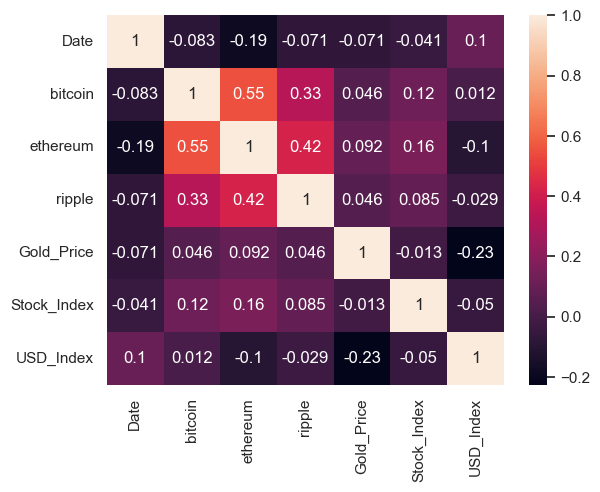

In [95]:
corr_matrix = six_assets.corr()
sns.heatmap(corr_matrix, annot = True)

In [96]:
model3 = smf.ols('bitcoin ~ Gold_Price + Stock_Index + USD_Index', data=six_assets).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bitcoin   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.744
Date:                Sun, 25 Feb 2024   Prob (F-statistic):             0.0426
Time:                        23:53:39   Log-Likelihood:                 753.32
No. Observations:                 474   AIC:                            -1499.
Df Residuals:                     470   BIC:                            -1482.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0015      0.002      0.651      0.516      -0.003       0.006
Gold_Price      0.4246      0.365      1.163      0.245      -0.293       1.142
Stock_Index     0.8124      0.308      2.637      0.009       0.207       1.418
USD_Index       0.4066      0.621      0.654      0.513      -0.814       1.627
==============================================================================
Omnibus:                       36.199   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.877
Skew:                           0.013   Prob(JB):                     1.42e-34
Kurtosis:                       5.809   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""